<a href="https://colab.research.google.com/github/gian793/ML/blob/main/Projects/08%20-%20Wine%20Quality/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import files

Kaggle link: https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [ ]:
# !!! ONLY for COLAB !!!! #

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  

In [4]:
wine  = pd.read_csv('winequality-red.csv', sep = ';')

tot_nan = wine.isnull().sum()
print("Total invalid entries:" + str(tot_nan))

Total invalid entries:fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Data plotting

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

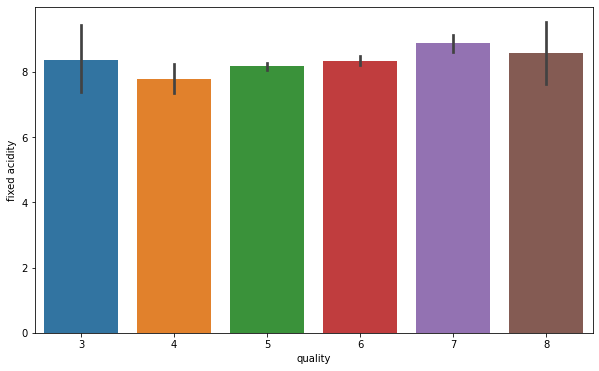

In [7]:
# Fixed acidity
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

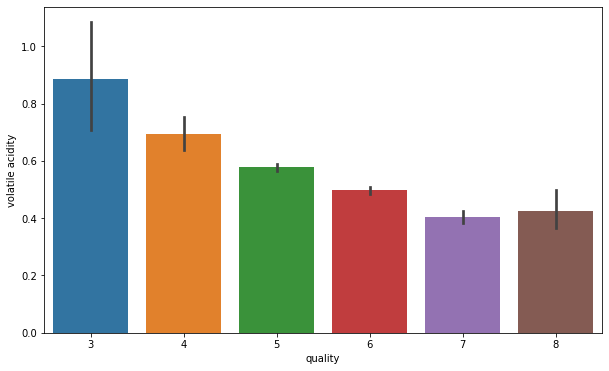

In [8]:
# Volatile acidity
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

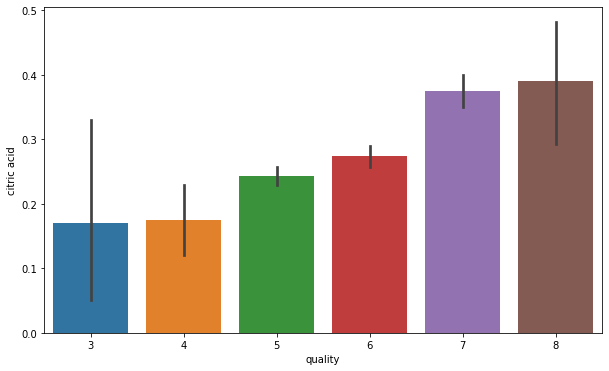

In [9]:
# Citric acid
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

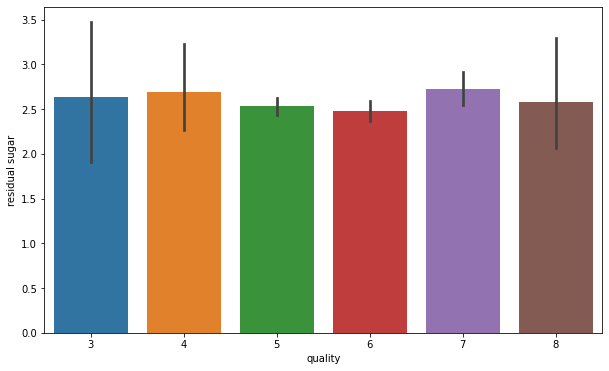

In [10]:
# Residual sugar
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

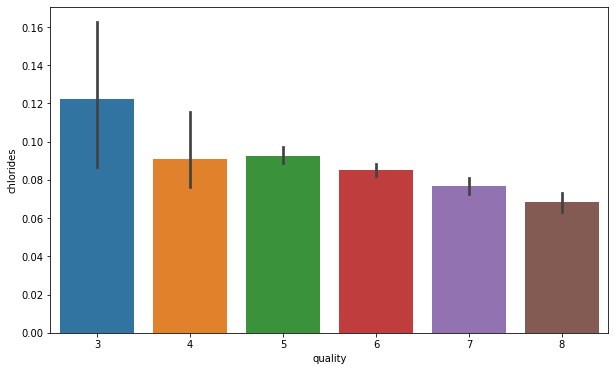

In [11]:
# Chlorides
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

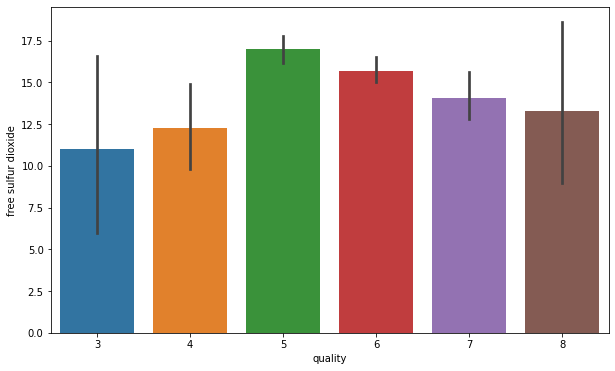

In [12]:
# Free sulfur dioxide
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

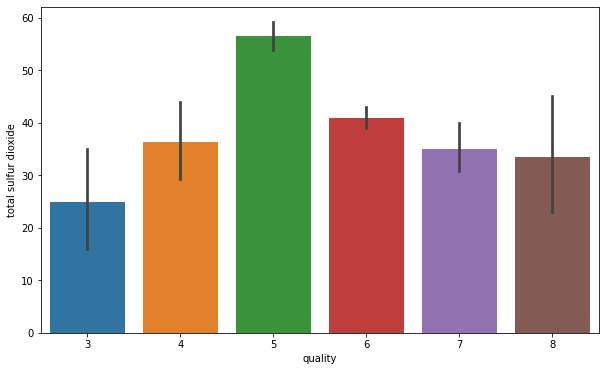

In [13]:
# Total sulfur dioxide
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

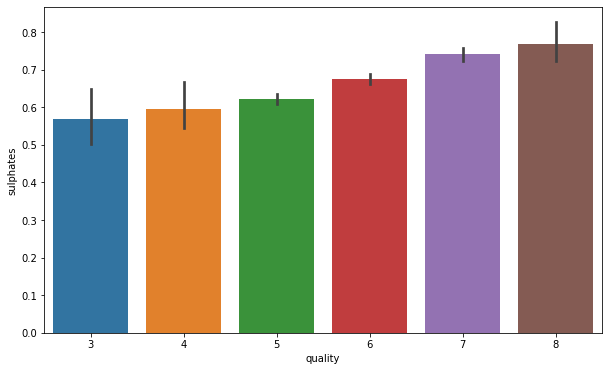

In [14]:
# Sulphates
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

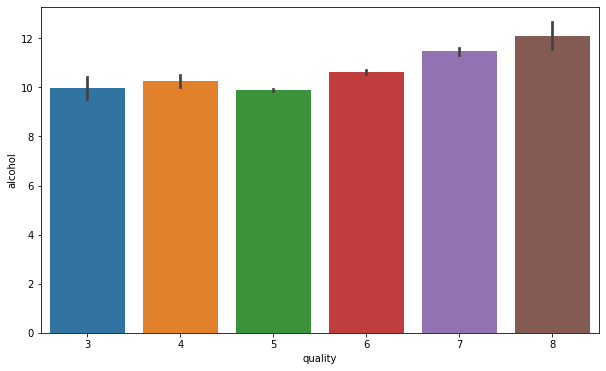

In [15]:
# Alcohol
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

<AxesSubplot:>

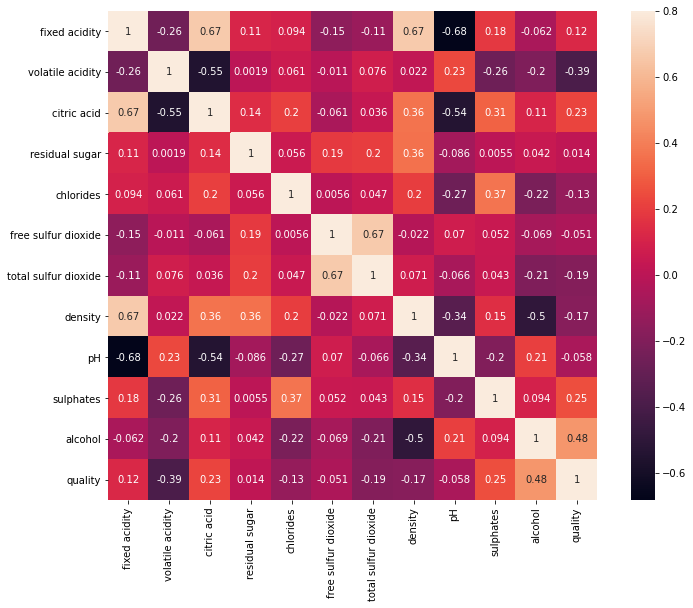

In [16]:
# Heatmap (Correlation matrix)
corrmat = wine.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

### Data preprocessing

In [17]:
# Making binary classificaion for the response variable.
# Dividing wine as good and bad by giving the limit for the quality

bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['judgement'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

wine.iloc[0:20,:]
#print(max(wine.quality))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,judgement
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,bad
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,bad
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,bad


In [18]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

#Bad becomes 0 and good becomes 1 
wine['goodness'] = label_quality.fit_transform(wine['judgement'])

wine.iloc[0:20,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,judgement,goodness
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,bad,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,bad,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,bad,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,good,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,good,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,bad,0


In [19]:
wine['goodness'].value_counts()

0    1382
1     217
Name: goodness, dtype: int64

<AxesSubplot:xlabel='goodness', ylabel='count'>

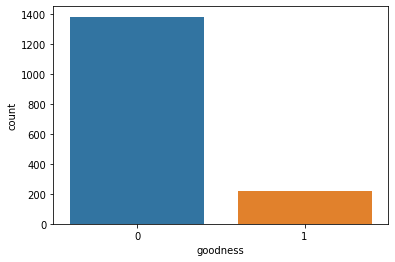

In [20]:
sns.countplot(wine['goodness'])

In [21]:
X = wine.drop(['quality', 'judgement', 'goodness'], axis = 1)

y = wine['goodness']

# Train and Test splasqitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
# Removing the mean and scaling to unit variance to get otimized results
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Random Forest

In [23]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

#Let's see how our model performed
mae = mean_absolute_error(y_test, pred_rfc)
print("Mean absolute error (mae) is: " + str(mae))
print("Percentage correct is " + str(sum(y_test == pred_rfc)/len(y_test)) + "%")
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

Mean absolute error (mae) is: 0.09375
Percentage correct is 0.90625%
[[265   8]
 [ 22  25]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       273
           1       0.76      0.53      0.62        47

    accuracy                           0.91       320
   macro avg       0.84      0.75      0.79       320
weighted avg       0.90      0.91      0.90       320



### Stochastic Gradient Decent Classifier

In [24]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

#Let's see how our model performed
mae = mean_absolute_error(y_test, pred_sgd)
print("Mean absolute error (mae) is: " + str(mae))
print("Percentage correct is " + str(sum(y_test == pred_sgd)/len(y_test)) + "%")
print(confusion_matrix(y_test, pred_sgd))
print(classification_report(y_test, pred_sgd))

Mean absolute error (mae) is: 0.15
Percentage correct is 0.85%
[[247  26]
 [ 22  25]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       273
           1       0.49      0.53      0.51        47

    accuracy                           0.85       320
   macro avg       0.70      0.72      0.71       320
weighted avg       0.86      0.85      0.85       320



### Support Vector Classifier

In [25]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

#Let's see how our model performed
mae = mean_absolute_error(y_test, pred_svc)
print("Mean absolute error (mae) is: " + str(mae))
print("Percentage correct is " + str(sum(y_test == pred_svc)/len(y_test)) + "%")
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test, pred_svc))

Mean absolute error (mae) is: 0.125
Percentage correct is 0.875%
[[268   5]
 [ 35  12]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



#### Grid Search - Cross Validation

In [54]:
#Finding best parameters for our SVC model

param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=9)

grid_svc.fit(X_train, y_train)

GridSearchCV(cv=9, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [55]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [57]:
#Let's run our SVC again with the best parameters.

svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
#print(classification_report(y_test, pred_svc2))

#Let's see how our model performed
mae = mean_absolute_error(y_test, pred_svc2)
print("Mean absolute error (mae) is: " + str(mae))
print("Percentage correct is " + str(sum(y_test == pred_svc2)/len(y_test)) + "%")
print(confusion_matrix(y_test, pred_svc2))
print(classification_report(y_test, pred_svc2))

Mean absolute error (mae) is: 0.103125
Percentage correct is 0.896875%
[[270   3]
 [ 30  17]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.85      0.36      0.51        47

    accuracy                           0.90       320
   macro avg       0.88      0.68      0.72       320
weighted avg       0.89      0.90      0.88       320



### Linear Regression

In [26]:
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

#X = pd.DataFrame(X_train)
#y = pd.DataFrame(y_train)

In [27]:
model = LogisticRegression()

model.fit(X_train, y_train) 
   
# predicting the test set results 
pred_lr = model.predict(X_test)

In [28]:
#Let's see how our model performed
mae = mean_absolute_error(y_test, pred_lr)
print("Mean absolute error (mae) is: " + str(mae))
print("Percentage correct is " + str(sum(y_test == pred_lr)/len(y_test)) + "%")
print(confusion_matrix(y_test, pred_lr))
print(classification_report(y_test, pred_lr))

Mean absolute error (mae) is: 0.134375
Percentage correct is 0.865625%
[[264   9]
 [ 34  13]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320



### XGBoost

In [29]:
# On target 'goodness'

model = xgb.XGBRegressor()
model.fit(X_train, y_train)

pred_xgb = model.predict(X_test)
mae = mean_absolute_error(y_test, pred_xgb)
print("Mean absolute error (mae) is: " + str(mae))

Mean absolute error (mae) is: 0.14766187805903427


In [30]:
# Improve the model

model_2 = xgb.XGBRegressor(n_estimators = 200, learning_rate=0.05)
model_2.fit(X_train, y_train)

pred_xgb_2 = model_2.predict(X_test)
mae_2 = mean_absolute_error(y_test, pred_xgb_2)
print("Mean absolute error (mae) is: " + str(mae))

Mean absolute error (mae) is: 0.14766187805903427
